## EXPLORACIÓN INICIAL

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


plt.rcParams["figure.figsize"] = (15,8)

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime 

In [2]:
df = pd.read_csv("datos/bikes.csv", index_col=0)
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
456,457,02-04-2019,summer,1,4,0,1,1,1,17.790433,21.37565,50.4348,20.913313,1208,4728,5936
117,118,28-04-2018,summer,0,4,0,4,1,2,25.317500,28.94645,70.0833,21.500836,569,3489,4058
405,406,10-02-2019,spring,1,2,0,5,1,2,11.514153,14.67790,54.0000,7.834243,227,3604,3831
690,691,22-11-2019,winter,1,11,1,4,0,1,13.940000,17.51855,58.0417,3.542344,955,1470,2425
46,47,16-02-2018,spring,0,2,0,3,1,1,13.048701,15.81000,42.3478,16.869997,218,1897,2115
646,647,09-10-2019,winter,1,10,0,2,1,2,18.313347,21.90560,76.1667,12.750100,601,5791,6392
192,193,12-07-2018,autumn,0,7,0,2,1,1,32.560847,36.96375,55.9167,13.417018,662,3596,4258
663,664,26-10-2019,winter,1,10,0,5,1,2,22.379153,26.13750,80.7083,8.875289,1182,6262,7444
391,392,27-01-2019,spring,1,1,0,5,1,2,17.425000,20.76915,74.1250,22.958689,269,3187,3456
573,574,28-07-2019,autumn,1,7,0,6,0,1,30.989153,34.88020,61.3333,10.542450,2234,4451,6685


In [3]:
# utilizamos una función de exploración para ver rápidamente algunas de las características que queremos explroar 
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe().T)
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object).T)
    print(".............................................")
    print('El numero de valores distintos de cada columna es:')
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 15:
            print(f'{col}: {len(dataframe[col].value_counts())}')
        else:
            print(f'{col}: {len(dataframe[col].value_counts())}')
            print(f'Los valores únicos de la columna "{col}" son: {dataframe[col].unique()}')

In [4]:
exploracion(df)

.............................................
En el dataframe hay 730 filas y 16 columnas.
.............................................
5 filas aleatorias:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
161,162,11-06-2018,summer,0,6,0,6,0,1,29.725000,33.9019,65.4583,10.374950,1729,3237,4966
149,150,30-05-2018,summer,0,5,1,1,0,1,30.066653,33.5546,68.5000,8.792075,1549,2549,4098
476,477,22-04-2019,summer,1,4,0,0,0,3,16.263347,19.4752,83.5417,23.084582,120,907,1027
599,600,23-08-2019,autumn,1,8,0,4,1,1,28.529153,31.8504,63.5833,5.667919,1363,6402,7765
668,669,31-10-2019,winter,1,10,0,3,1,2,14.657500,18.0550,66.6667,11.166689,419,5147,5566


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,instant,int64
1,dteday,object
2,season,object
3,yr,int64
4,mnth,int64
5,holiday,int64
6,weekday,int64
7,workingday,int64
8,weathersit,int64
9,temp,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,instant,0
1,dteday,0
2,season,0
3,yr,0
4,mnth,0
5,holiday,0
6,weekday,0
7,workingday,0
8,weathersit,0
9,temp,0


.............................................
El porcentaje de nulos por columna del dataframe son:


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


.............................................
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


.............................................
El numero de valores distintos de cada columna es:
instant: 730
dteday: 730
season: 4
Los valores únicos de la columna "season" son: ['spring' 'summer' 'autumn' 'winter']
yr: 2
Los valores únicos de la columna "yr" son: [0 1]
mnth: 12
Los valores únicos de la columna "mnth" son: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: 2
Los valores únicos de la columna "holiday" son: [0 1]
weekday: 7
Los valores únicos de la columna "weekday" son: [6 0 1 2 3 4 5]
workingday: 2
Los valores únicos de la columna "workingday" son: [0 1]
weathersit: 3
Los valores únicos de la columna "weathersit" son: [2 1 3]
temp: 498
atemp: 689
hum: 594
windspeed: 649
casual: 605
registered: 678
cnt: 695


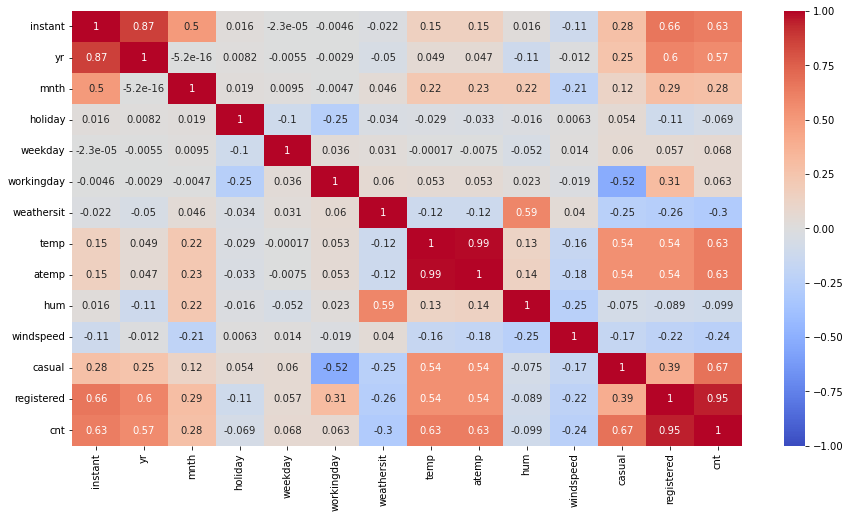

In [5]:
# realizamos un heatmap para ver la correlación entre las variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin= -1, vmax=1);

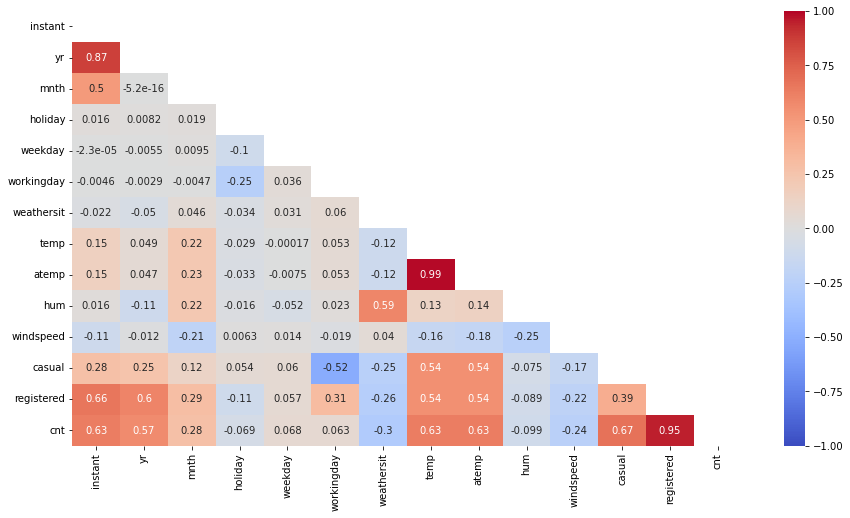

In [6]:
# realizamos un heatmap con máscara para verlo mejor
mask = np.triu(np.ones_like(df.corr(),dtype = np.bool_))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask = mask, vmin= -1, vmax=1);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


## Elección de variables respuesta y eliminación de columnas redundantes o irrelevantes
- La exploración inicial sugiere que será mejor realizar un modelo para alquiler de bicis tipo "casual" y otro para tipo "registered" porque tienen muy poca correlación entre ellas y la correlación con otras variables también es muy diferente.
- Tras la exploración inicial hemos decidido también prescindir de las columnas instant y cnt ya qye la primera es redundante con el índice y la información de la segunda resulta irrelevante de cara a realizar un modelo para el alquiler de bicis de tipo "casual" y otro para tipo "registered"
- Puesto que las columnas "temp" y "atemp" tienen una correlación muy alta (cercana a 1), hemos decidido prescindir de la de atemp (sensación térmica). La correlación de las dos con nuestras variables respuesta es igual. 

In [8]:
df.drop(['instant', 'cnt', 'atemp'], axis=1, inplace=True)
df.sample()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
236,25-08-2018,autumn,0,8,0,4,1,2,28.050847,77.1667,14.125811,435,3107


## Renombrado de columnas para facilitar la lectura y visualización de resultados

In [9]:
nuevas_columnas = {'dteday' : 'date', 'yr' : 'year', 'mnth': 'month', 'weathersit': 'weather'}
df.rename(columns= nuevas_columnas, inplace=True)
df.sample()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
538,23-06-2019,autumn,1,6,0,6,0,1,29.998347,53.4583,12.041307,2657,4801


## Exploración de las columnas 'year' y 'month' para comprobar que los datos son correctos respecto a la columna 'dteday'

In [10]:
df['date_year'] = df['date'].str.split('-', expand=True).get(2)
df_yr_0 = df[df['year'] == 0]
df_yr_1 = df[df['year'] == 1]
print(f'Los valores únicos de año de "date_year" para year=0 (año 2018) son: {df_yr_0.date_year.unique()}')
print(f'Los valores únicos de año de "date_year" para year=1 (año 2019) son: {df_yr_1.date_year.unique()}')

Los valores únicos de año de "date_year" para year=0 (año 2018) son: ['2018']
Los valores únicos de año de "date_year" para year=1 (año 2019) son: ['2019']


- Los datos de la columna 'year' son correctos.

In [11]:
df['date_month'] = df['date'].str.split('-', expand=True).get(1)
for month in df['month'].unique():
    print(f'Los valores únicos de comprobación de "month" = {month} son: {df[df["month"] == month]["date_month"].unique()}')

Los valores únicos de comprobación de "month" = 1 son: ['01']
Los valores únicos de comprobación de "month" = 2 son: ['02']
Los valores únicos de comprobación de "month" = 3 son: ['03']
Los valores únicos de comprobación de "month" = 4 son: ['04']
Los valores únicos de comprobación de "month" = 5 son: ['05']
Los valores únicos de comprobación de "month" = 6 son: ['06']
Los valores únicos de comprobación de "month" = 7 son: ['07']
Los valores únicos de comprobación de "month" = 8 son: ['08']
Los valores únicos de comprobación de "month" = 9 son: ['09']
Los valores únicos de comprobación de "month" = 10 son: ['10']
Los valores únicos de comprobación de "month" = 11 son: ['11']
Los valores únicos de comprobación de "month" = 12 son: ['12']


- Los datos de la columna 'month' son correctos.

In [12]:
# eliminamos las columnas que hemos creado tan solo para comprobar las columnas 'yr' y 'mnth'
df.drop(columns=['date_year', 'date_month'], inplace=True)
df.sample()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
567,22-07-2019,autumn,1,7,0,0,0,2,27.3675,76.25,6.292694,2544,4866


In [13]:
# comprobamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    object 
 1   season      730 non-null    object 
 2   year        730 non-null    int64  
 3   month       730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weather     730 non-null    int64  
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 79.8+ KB


## Conversión de la columna 'date' a datetime

In [14]:
df['date'] = pd.to_datetime(df['date'], format= '%d-%m-%Y')
df.sample(20)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
58,2018-02-28,spring,0,2,0,1,1,2,16.698193,87.6364,19.408962,81,1365
442,2019-03-19,spring,1,3,0,1,1,1,22.345000,72.8750,10.875239,982,5171
396,2019-02-01,spring,1,2,0,3,1,1,19.235847,50.7917,12.667489,304,4275
681,2019-11-13,winter,1,11,0,2,1,2,14.076653,66.2917,22.917082,327,3767
520,2019-06-05,summer,1,6,0,2,1,2,22.174153,61.3333,14.041525,968,6033
163,2018-06-13,summer,0,6,0,1,1,1,26.035000,49.4583,20.458450,863,4157
263,2018-09-21,autumn,0,9,0,3,1,2,24.395000,90.0000,6.459081,539,3813
533,2019-06-18,summer,1,6,0,1,1,2,23.301653,77.7917,11.707982,653,4446
170,2018-06-20,summer,0,6,0,1,1,2,26.035000,74.6250,10.416825,699,3311
466,2019-04-12,summer,1,4,0,4,1,1,16.297500,46.6250,19.458743,663,4746


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weather     730 non-null    int64         
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 79.8+ KB


## Correción de la columna 'seasons'

In [16]:
def estaciones(dato):

    primavera = np.union1d(pd.date_range(start= '2018-03-21', end='2018-06-21'), pd.date_range(start= '2019-03-21', end='2019-06-21'))
    verano = np.union1d(pd.date_range(start= '2018-06-22', end='2018-09-22'), pd.date_range(start= '2019-06-22', end='2019-09-22'))
    otoño = np.union1d(pd.date_range(start= '2018-09-23', end='2018-12-21'), pd.date_range(start= '2019-09-23', end='2019-12-21'))
    invierno = np.union1d(pd.date_range(start= '2018-12-22', end='2019-03-20'), pd.date_range(start= '2019-12-22', end='2020-03-20'))

    if dato in primavera:
        return 'spring'
    elif dato in verano:
        return 'summer'
    elif dato in otoño:
        return 'autumn'
    else:
        return 'winter'

In [17]:
df['season'] = df['date'].apply(estaciones)
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
364,2018-12-31,winter,0,12,0,6,0,1,16.810000,61.5833,14.750318,665,1820
43,2018-02-13,winter,0,2,0,0,0,1,12.977402,45.7391,17.479161,397,1192
660,2019-10-23,autumn,1,10,0,2,1,1,22.310847,64.1667,6.334569,841,6625
252,2018-09-10,summer,0,9,0,6,0,1,27.060000,75.3750,10.291736,1750,3595
140,2018-05-21,spring,0,5,0,6,0,1,24.702500,62.6667,8.083550,2258,3547
45,2018-02-15,winter,0,2,0,2,1,1,10.909567,31.4348,19.522058,140,1675
197,2018-07-17,summer,0,7,0,0,0,1,29.485847,60.4167,16.417211,2006,3296
359,2018-12-26,winter,0,12,1,1,0,1,13.191299,50.6957,16.044155,430,887
589,2019-08-13,summer,1,8,0,1,1,1,29.554153,54.5417,9.126204,1207,5676
676,2019-11-08,autumn,1,11,0,4,1,1,14.439134,33.3478,23.304945,340,4975


In [18]:
# comprobamos que el índice es contínuo
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
           dtype='int64', length=730)

## Exploración y corrección de la columna 'holiday'

In [19]:
# vemos los festivos que tenemos
festivos = df[df['holiday'] == 1]
festivos

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
16,2018-01-17,winter,0,1,1,1,0,2,7.209153,53.7500,12.999139,117,883
51,2018-02-21,winter,0,2,1,1,0,2,12.436653,60.5000,20.625682,195,912
104,2018-04-15,spring,0,4,1,5,0,1,18.313347,67.1250,15.167125,642,2484
149,2018-05-30,spring,0,5,1,1,0,1,30.066653,68.5000,8.792075,1549,2549
184,2018-07-04,summer,0,7,1,1,0,2,29.793347,63.7917,5.459106,3065,2978
247,2018-09-05,summer,0,9,1,1,0,2,27.606653,79.0417,14.250632,1236,2115
282,2018-10-10,autumn,0,10,1,1,0,1,23.404153,73.3750,2.834381,1514,3603
314,2018-11-11,autumn,0,11,1,5,0,1,13.290847,44.6250,21.083225,440,2928
327,2018-11-24,autumn,0,11,1,4,0,1,15.306653,54.9167,11.209368,560,935
359,2018-12-26,winter,0,12,1,1,0,1,13.191299,50.6957,16.044155,430,887


In [20]:
print(f'Tenemos {festivos.shape[0]} festivos en total en el dataset original')

Tenemos 21 festivos en total en el dataset original


- Si nos fijamos llama la atención la ausencia de festivos de sobra conocidos como año nuevo de 2018, mientras que otros parecen estar desplazados. Sin embargo, no se aprecia ningún patrón, por lo que se decide proceder a corregir la columna obviando los datos existentes y sustituyendolos por los datos más fiables de los que se dispone

In [21]:
# En una primera aproximación se pensó en ponerlos a mano pero se ha encontrado una solución más adecuada y automatizada
#lista_festivos_bien = ['2018-01-01' ,'2018-01-15', '2018-02-19', '2018-04-01', '2018-04-16','2018-05-13', '2018-05-28', '2018-06-17','2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-05', '2018-12-24','2018-12-25', '2019-01-01', '2019-01-21', '2019-04-16', '2019-04-21','2019-05-12', '2019-05-27', '2019-06-16','2019-07-04', '2019-09-02', '2019-10-14', '2019-11-28', '2019-12-24', '2019-12-25']
#df.loc[df['dteday'].isin(lista_festivos_bien), "holiday"] = 1
#df['holiday'].value_counts()

In [22]:
# mediante la librería holiday de pandas obtenemos el calendario de festivos federales de USA
cal = calendar() #llamada al calendario
holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())
df['holiday'] = df['date'].isin(holidays)

In [23]:
# visualizamos los festivos obtenidos
festivos = df[df['holiday'] ==  True]
festivos

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,True,6,0,2,14.110847,80.5833,10.749882,331,654
14,2018-01-15,winter,0,1,True,6,0,2,9.566653,49.8750,10.583521,222,1026
49,2018-02-19,winter,0,2,True,6,0,1,16.365847,18.7917,34.000021,532,1103
147,2018-05-28,spring,0,5,True,6,0,1,26.889153,72.9583,15.416164,2001,2757
184,2018-07-04,summer,0,7,True,1,0,2,29.793347,63.7917,5.459106,3065,2978
245,2018-09-03,summer,0,9,True,6,0,1,27.435847,71.6667,12.416775,1935,2549
280,2018-10-08,autumn,0,10,True,6,0,1,21.388347,70.1250,3.042081,2235,3174
315,2018-11-12,autumn,0,11,True,6,0,1,14.623347,55.2917,14.208154,1275,2792
325,2018-11-22,autumn,0,11,True,2,1,3,17.083347,96.2500,7.959064,69,1538
358,2018-12-25,winter,0,12,True,0,0,1,11.266103,68.1304,10.391097,303,451


In [24]:
print(f'Tenemos {festivos.shape[0]} festivos en total obtenidos directamente de la librería holiday de pandas')

Tenemos 20 festivos en total obtenidos directamente de la librería holiday de pandas


- Si nos fijamos tenemos un festivo menos que antes de la tranformación pero, de nuevo, los festivos originales eran incorrectos por lo que tampoco debemos fiarnos  su conteo. Comprobamos que la url indicada en el archivo readme.txt de la web utilizada para la obtención de los festivos del dataset original es incorrecta. Si lo completamos con una "s" al final del link obtenemos una [url válida](http://dchr.dc.gov/page/holiday-schedules) pero que solo nos permite ver los de 2023 pero no los de 2018 y 2019 que son los años en estudio. Realizamos una pequeña investigación online donde encontramos que en EEUU, y en concreto en el Distrito de Columbia, hay distintos tipos de festivos y hay que tener cuidado con las fuentes porque muchas webs indican festivos diferentes para el mismo año. Encontramos otra url del mismo DCHR donde encontramos los [festivos de 2019](https://edpm.dc.gov/issuances/legal-public-holidays-2019/) y de [2023](https://edpm.dc.gov/issuances/legal-public-holidays-2023/) pero no los de 2018. Dado que los de 2023 de ambas url coinciden entendemos que lo mismo ocurrirá con los de 2019. Comparando estos festivos con los que obtenemos de la librería Holiday de Pandas (USFederalHolidayCalendar) vemos que son todos correctos, tan solo faltaría el 16 de abril que al ser de tipo Goverment Holiday en lugar de Federal Holiday no está recogida en la librería. En el caso de 2018 encontramos [aquí](https://dchr.sp.dc.gov/policy/PCA/EDPM/Issuances/Legal%20Public%20Holidays%202018.pdf) la confirmación de los festivos según DCHR, coincidiendo todos con los obtenidos de la librería, salvo también el 16 de abril que está en este listado y no lo da la librería. Por lo tanto, consideramos que los datos obtenidos de la librería pueden considerarse correctos y añadimos manualmente la fecha que falta (16 abril) para ambos años en estudio. No obstante, visto que el tema de identificar los festivos del Distrito de Columbia no resulta tan sencillo como cabría esperar, quizá podría analizarse con el producto owner la posibilidad de que nos suministre un listado comprobado por el cliente de cuales son que originariamente creía que estaban incluidos en el dataset o los que desea que se utilicen en el análisis.

In [25]:
# aladimos manualemente el 16-04-2018 y el 16-04-2019 como festivo:
df.loc[(df["date"] == '2018-04-16') | (df["date"] == '2019-04-16'), "holiday"] = True
# volvemos a filtrar los festivos para comprobar que está correcto:
festivos = df[df['holiday'] ==  True]
print(f'Finalmente tendremos {festivos.shape[0]} festivos en total tras añadir los que hemos considerado necearios tras la pequeña inversigación realizada online')
festivos

Finalmente tendremos 22 festivos en total tras añadir los que hemos considerado necearios tras la pequeña inversigación realizada online


,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,True,6,0,2,14.110847,80.5833,10.749882,331,654
14,2018-01-15,winter,0,1,True,6,0,2,9.566653,49.8750,10.583521,222,1026
49,2018-02-19,winter,0,2,True,6,0,1,16.365847,18.7917,34.000021,532,1103
105,2018-04-16,spring,0,4,True,6,0,3,17.664153,88.8333,22.834136,121,674
147,2018-05-28,spring,0,5,True,6,0,1,26.889153,72.9583,15.416164,2001,2757
184,2018-07-04,summer,0,7,True,1,0,2,29.793347,63.7917,5.459106,3065,2978
245,2018-09-03,summer,0,9,True,6,0,1,27.435847,71.6667,12.416775,1935,2549
280,2018-10-08,autumn,0,10,True,6,0,1,21.388347,70.1250,3.042081,2235,3174
315,2018-11-12,autumn,0,11,True,6,0,1,14.623347,55.2917,14.208154,1275,2792
325,2018-11-22,autumn,0,11,True,2,1,3,17.083347,96.2500,7.959064,69,1538


In [26]:
# Para poder realizar las visualizaciones cambiamos los valores de la columna con el método .map()
mapa = {True: 'holiday', False: 'not holiday'}
df['holiday'] = df['holiday'].map(mapa)

In [27]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
519,2019-06-04,spring,1,6,not holiday,1,1,1,24.497500,48.7083,19.083811,1071,5927
33,2018-02-03,winter,0,2,not holiday,4,1,1,7.665237,43.7826,18.609384,61,1489
591,2019-08-15,summer,1,8,not holiday,3,1,1,28.973347,61.9583,11.374657,1198,6149
577,2019-08-01,summer,1,8,not holiday,3,1,1,29.417500,67.7500,9.458993,1074,6506
526,2019-06-11,spring,1,6,not holiday,1,1,2,29.554153,58.7917,13.916771,1017,5647
118,2018-04-29,spring,0,4,not holiday,5,1,1,20.910000,45.7083,16.084221,878,3717
569,2019-07-24,summer,1,7,not holiday,2,1,1,30.784153,65.5000,14.167418,1140,6452
46,2018-02-16,winter,0,2,not holiday,3,1,1,13.048701,42.3478,16.869997,218,1897
205,2018-07-25,summer,0,7,not holiday,1,1,1,30.476653,75.7083,6.084156,568,3272
219,2018-08-08,summer,0,8,not holiday,1,1,1,31.365000,59.2083,12.875725,846,3480


In [28]:
# realizamos una pequeña exploiración de los datos de esta columna, una vez corregidos, respecto a las variables respuesta 
df['holiday'].value_counts()

not holiday    708
holiday         22
Name: holiday, dtype: int64

In [29]:
df.groupby('holiday')['registered', 'casual'].mean().reset_index()

,holiday,registered,casual
0,holiday,2577.045455,1315.500000
1,not holiday,3692.370056,834.761299


In [30]:
df.groupby('holiday')['registered', 'casual'].median().reset_index()

,holiday,registered,casual
0,holiday,2774.5,1236.5
1,not holiday,3694.5,711.5


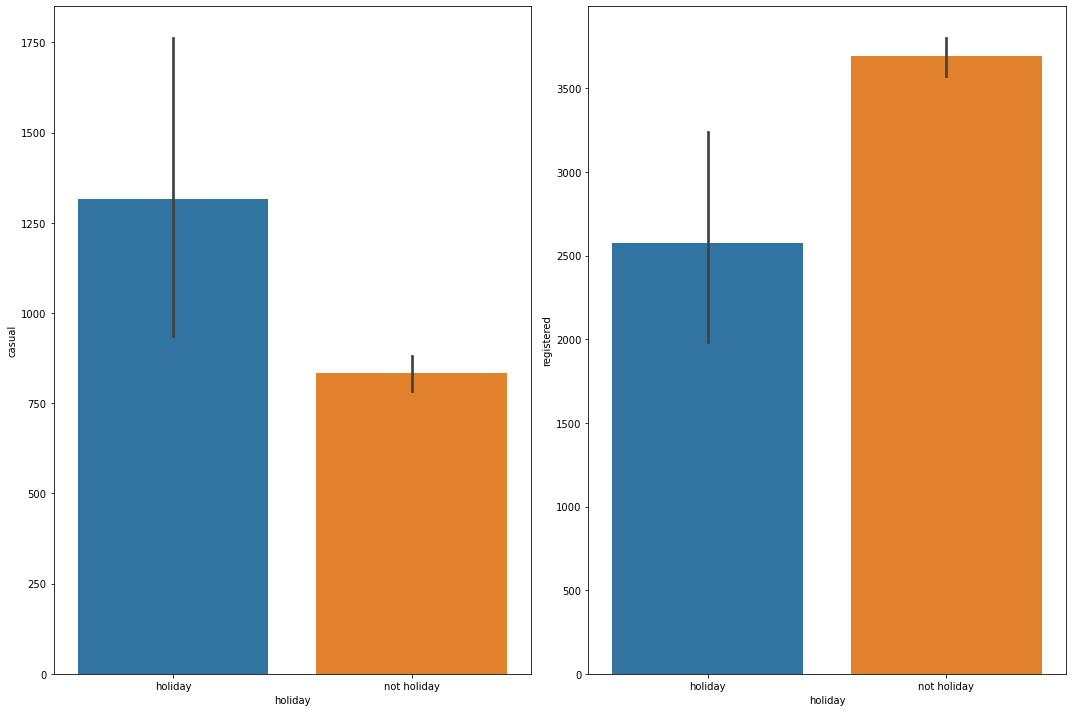

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.barplot(x = 'holiday', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

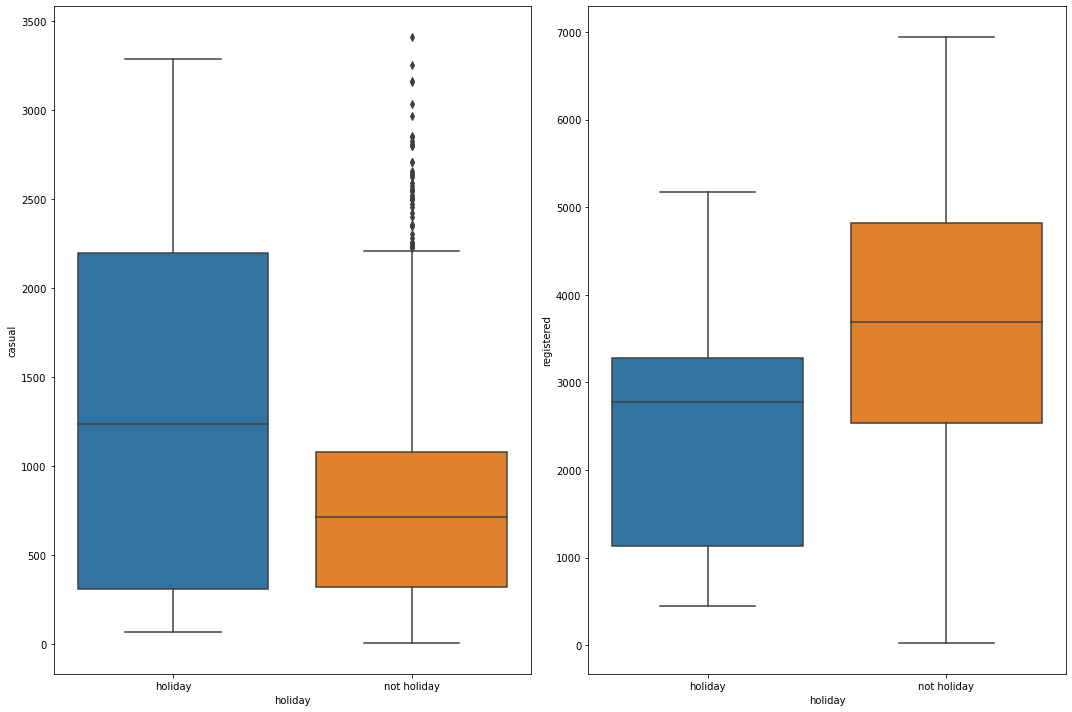

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.boxplot(x = 'holiday', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

## Exploración y corrección de la columna 'weekday'

- En las explraciones realizadas se ve claramente que los datos de esta columna son erroneos por lo que procedemos a corregirlos

In [33]:
# corregimos la columna
df["weekday"]= df["date"].dt.day_name()
# exploramos los valores
df['weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

In [34]:
df.sample(10)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
256,2018-09-14,summer,0,9,not holiday,Friday,1,1,27.606653,69.7083,11.209100,647,4138
220,2018-08-09,summer,0,8,not holiday,Thursday,1,1,31.775000,57.0417,10.125107,907,3695
598,2019-08-22,summer,1,8,not holiday,Thursday,1,1,27.367500,67.7083,4.708981,1094,6281
112,2018-04-23,spring,0,4,not holiday,Monday,0,2,18.860000,88.7917,15.458575,1462,2574
549,2019-07-04,summer,1,7,holiday,Thursday,0,1,32.355847,53.8750,9.041650,2562,4841
131,2018-05-12,spring,0,5,not holiday,Saturday,1,1,21.935000,74.7500,12.707689,695,4169
271,2018-09-29,autumn,0,9,not holiday,Saturday,1,1,25.283347,69.9167,11.583161,653,4186
215,2018-08-04,summer,0,8,not holiday,Saturday,1,2,29.110000,75.7500,13.209050,799,3777
232,2018-08-21,summer,0,8,not holiday,Tuesday,0,1,29.144153,77.0000,16.666518,1249,2624
176,2018-06-26,summer,0,6,not holiday,Tuesday,0,1,27.880000,51.3333,6.333731,1920,3385


## Exploración y corrección de la columna 'workingday'

In [35]:
# separamos en un dataframe los días laborables (workingday' = 1)
df_wd_1 = df[df['workingday'] == 1]
# separamos en un dataframe los fines de semana y festivos (workingday' = 0)
df_wd_0 = df[df['workingday'] == 0]
# comprobamos que en fines de semana y festivos solo salgan weekda:
print(f'Comprobamos que para "workingday" = 1 (días laborables) los valores únicos de weekday deberían ser L-V (Monday,Tuesday,Wednesday,Thursday,Friday) y son: {df_wd_1["weekday"].unique()}')
print(f'Comprobamos que para "workingday" = 1 (días laborables) el valor único de holiday debería se NO festivo (not holiday) y es: {df_wd_1["holiday"].unique()}')
# comprobamos que en fines de semana y festivos solo salgan weekda:
print(f'Comprobamos que para "workingday" = 0 (findes y festivos), si filtramos por "holiday" = 0 (NO festivos), los valores únicos de weekday deberían ser sab-dom (Saturday,Sunday) y son: {df_wd_0[df_wd_0["holiday"] == "not holiday"]["weekday"].unique()}')

Comprobamos que para "workingday" = 1 (días laborables) los valores únicos de weekday deberían ser L-V (Monday,Tuesday,Wednesday,Thursday,Friday) y son: ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Tuesday']
Comprobamos que para "workingday" = 1 (días laborables) el valor único de holiday debería se NO festivo (not holiday) y es: ['not holiday' 'holiday']
Comprobamos que para "workingday" = 0 (findes y festivos), si filtramos por "holiday" = 0 (NO festivos), los valores únicos de weekday deberían ser sab-dom (Saturday,Sunday) y son: ['Tuesday' 'Monday' 'Wednesday' 'Sunday' 'Saturday' 'Friday']


- De la exploración realizada concluimos que los datos de la columna 'workingday' no son correctos por lo que procedemos a corregirlos en base a los datos de las columnas 'weekday' y 'holiday' corregidas

In [36]:
def laborables(dato):
    laborables = pd.date_range(start= '2018-01-01', end='2019-12-31', freq='B')
    if dato in laborables:
        return 'workingday'
    else:
        return 'weekend or holiday'

In [37]:
# primero realizamos una primera aproximación separando días de lunes a viernes de sábados y domingos
df['workingday'] = df['date'].apply(laborables)
df.head(15)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,holiday,Monday,workingday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,not holiday,Tuesday,workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,not holiday,Wednesday,workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,not holiday,Thursday,workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,not holiday,Friday,workingday,1,9.305237,43.6957,12.522300,82,1518
5,2018-01-06,winter,0,1,not holiday,Saturday,weekend or holiday,1,8.378268,51.8261,6.000868,88,1518
6,2018-01-07,winter,0,1,not holiday,Sunday,weekend or holiday,2,8.057402,49.8696,11.304642,148,1362
7,2018-01-08,winter,0,1,not holiday,Monday,workingday,2,6.765000,53.5833,17.875868,68,891
8,2018-01-09,winter,0,1,not holiday,Tuesday,workingday,1,5.671653,43.4167,24.250650,54,768
9,2018-01-10,winter,0,1,not holiday,Wednesday,workingday,1,6.184153,48.2917,14.958889,41,1280


In [38]:
df['workingday'].value_counts()

workingday            522
weekend or holiday    208
Name: workingday, dtype: int64

In [39]:
# corregimos los festivos para pasarlos a 'weekend or holiday'.
df.loc[df["holiday"] == 'holiday', "workingday"] = 'weekend or holiday'
df.head(15)

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,holiday,Monday,weekend or holiday,2,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,not holiday,Tuesday,workingday,2,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,not holiday,Wednesday,workingday,1,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,not holiday,Thursday,workingday,1,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,not holiday,Friday,workingday,1,9.305237,43.6957,12.522300,82,1518
5,2018-01-06,winter,0,1,not holiday,Saturday,weekend or holiday,1,8.378268,51.8261,6.000868,88,1518
6,2018-01-07,winter,0,1,not holiday,Sunday,weekend or holiday,2,8.057402,49.8696,11.304642,148,1362
7,2018-01-08,winter,0,1,not holiday,Monday,workingday,2,6.765000,53.5833,17.875868,68,891
8,2018-01-09,winter,0,1,not holiday,Tuesday,workingday,1,5.671653,43.4167,24.250650,54,768
9,2018-01-10,winter,0,1,not holiday,Wednesday,workingday,1,6.184153,48.2917,14.958889,41,1280


In [40]:
# comprobamos que el numero de festivos (22) corresponde con el cambio en el conteo
df['workingday'].value_counts()

workingday            500
weekend or holiday    230
Name: workingday, dtype: int64

In [41]:
#realizamos la misma comprobación para ver que ahora sí son correctos los datos
# separamos en un dataframe los días laborables (workingday' = 1)
df_wd_1 = df[df['workingday'] == 'workingday']
# separamos en un dataframe los fines de semana y festivos (workingday' = 0)
df_wd_0 = df[df['workingday'] == 'weekend or holiday']
# comprobamos que en fines de semana y festivos solo salgan weekda:
print(f'Comprobamos que para días laborables los valores únicos de weekday deberían ser (Monday,Tuesday,Wednesday,Thursday,Friday) y son: {df_wd_1["weekday"].unique()}')
print(f'Comprobamos que para días laborables el valor único de holiday debería ser (not holiday) y es: {df_wd_1["holiday"].unique()}')
# comprobamos que en fines de semana y festivos solo salgan weekda:
print(f'Comprobamos que para findes y festivos, si filtramos por días NO festivos, los valores únicos de weekday deberían ser (Saturday,Sunday) y son: {df_wd_0[df_wd_0["holiday"] == "not holiday"]["weekday"].unique()}')

Comprobamos que para días laborables los valores únicos de weekday deberían ser (Monday,Tuesday,Wednesday,Thursday,Friday) y son: ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday']
Comprobamos que para días laborables el valor único de holiday debería ser (not holiday) y es: ['not holiday']
Comprobamos que para findes y festivos, si filtramos por días NO festivos, los valores únicos de weekday deberían ser (Saturday,Sunday) y son: ['Saturday' 'Sunday']


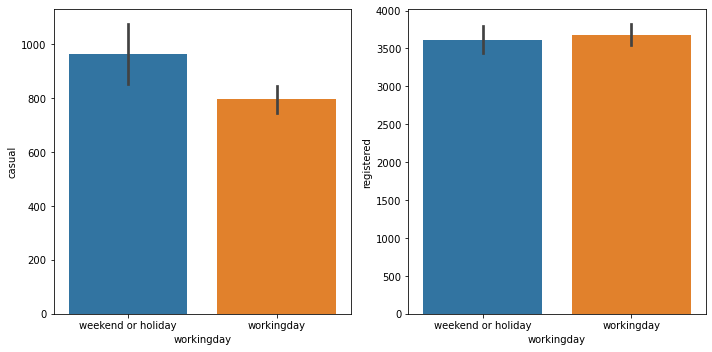

In [42]:
# realizamos una pequeña exploración
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):
    # para trazar una línea de densidad
    sns.barplot(x='workingday', y=df[columna], data=df, ax=axes[indice])

plt.tight_layout()

## Exploración y categorización de la columna 'weather'

In [43]:
#para facilitar la lectura aplicamos un .map()
mapa_weather = {1: 'clear', 2: 'cloudy', 3: 'stormy', 4: 'thunderstorm'}

In [44]:
df['weather'] = df['weather'].map(mapa_weather)
df['weather'].value_counts()

clear     463
cloudy    246
stormy     21
Name: weather, dtype: int64

In [45]:
# exploración de los datos
df.groupby('weather')['registered', 'casual'].mean().reset_index()

,weather,registered,casual
0,clear,3912.755940,964.030238
1,cloudy,3354.930894,689.882114
2,stormy,1617.809524,185.476190


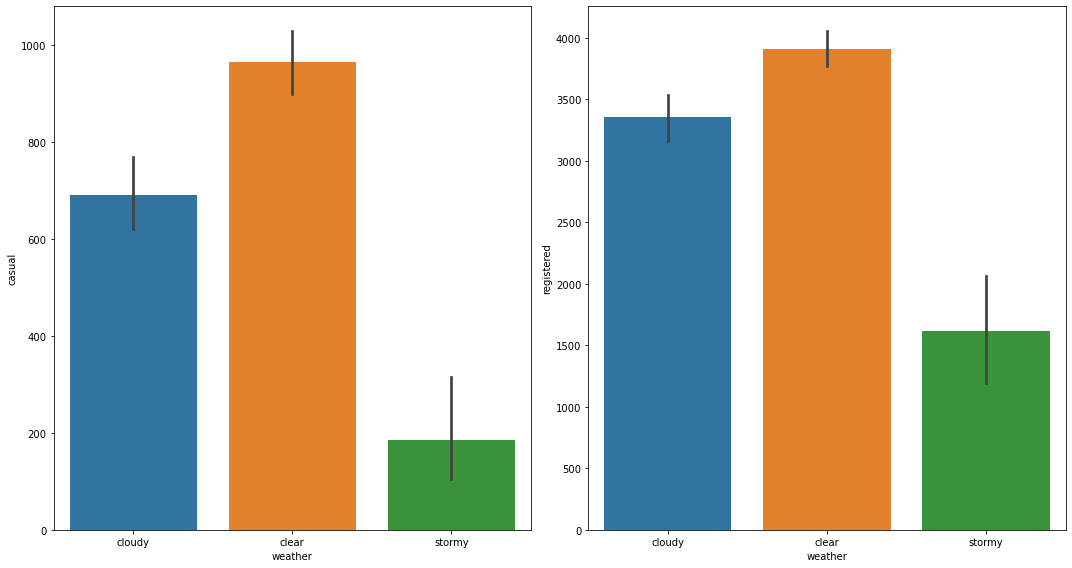

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.barplot(x = 'weather', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

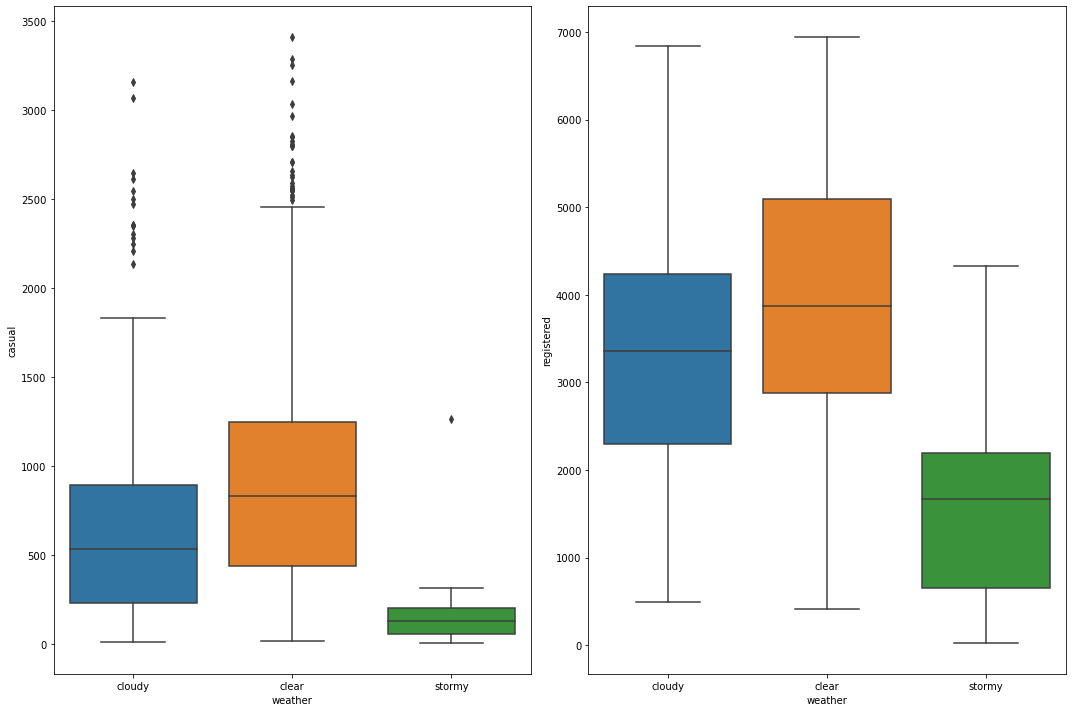

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

axes = axes.flat

for indice, columna in enumerate(df.columns[-2:]):

    sns.boxplot(x = 'weather', y =df[columna], data=df, ax= axes[indice])

plt.tight_layout();

## Exploración gráfica adicional

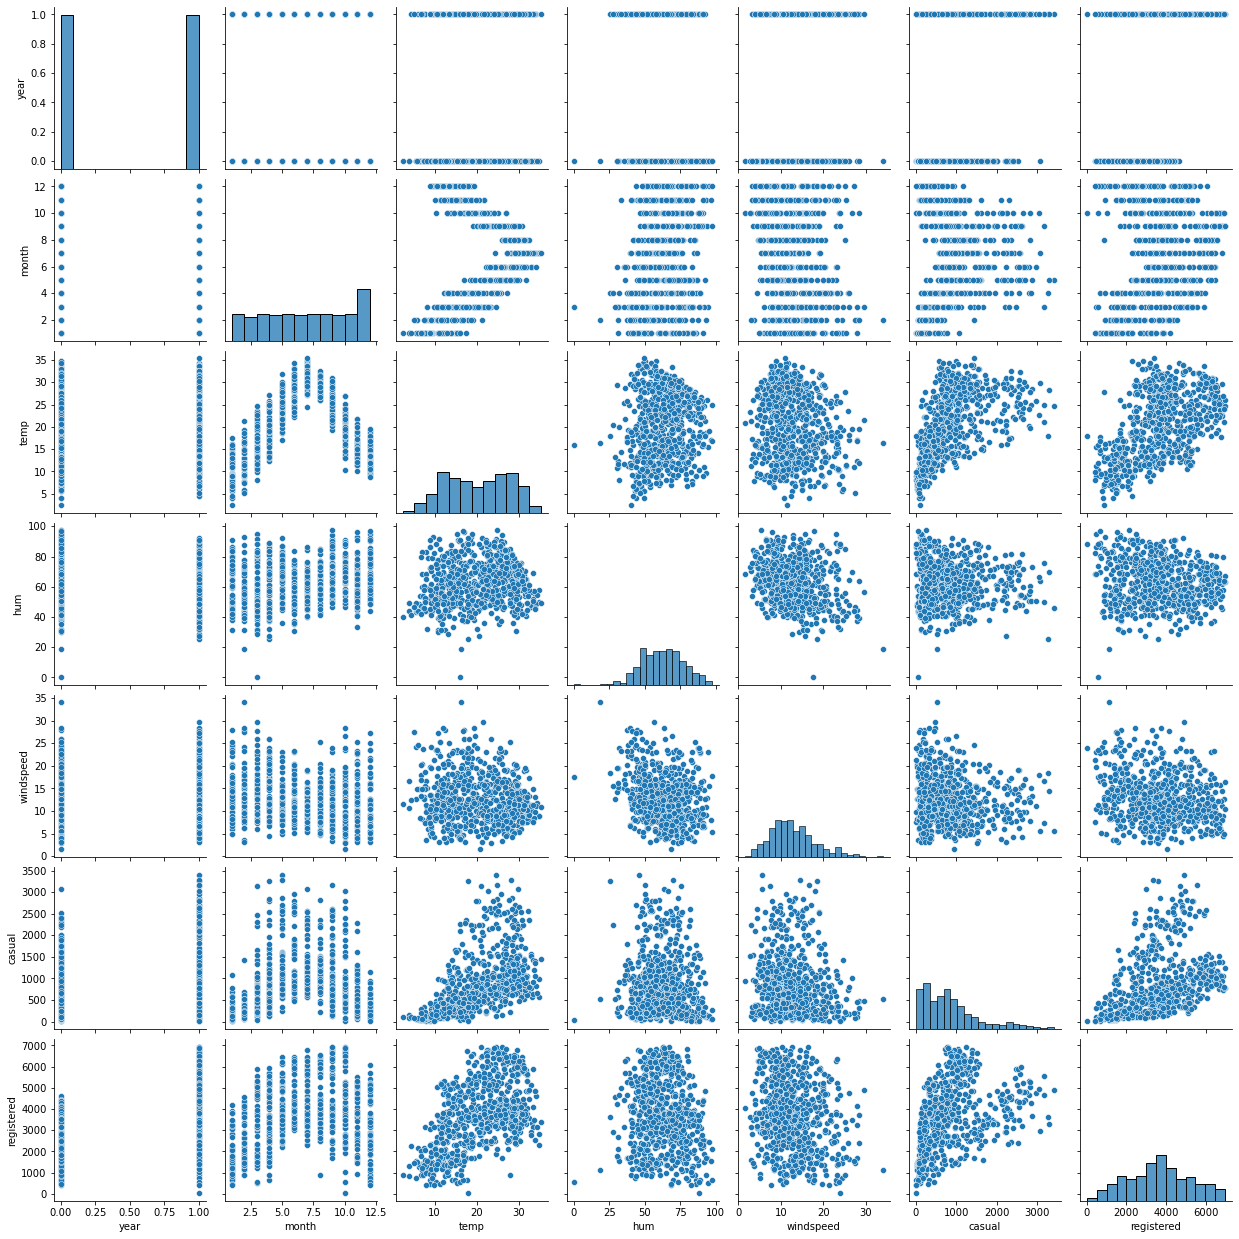

In [48]:
sns.pairplot(df);

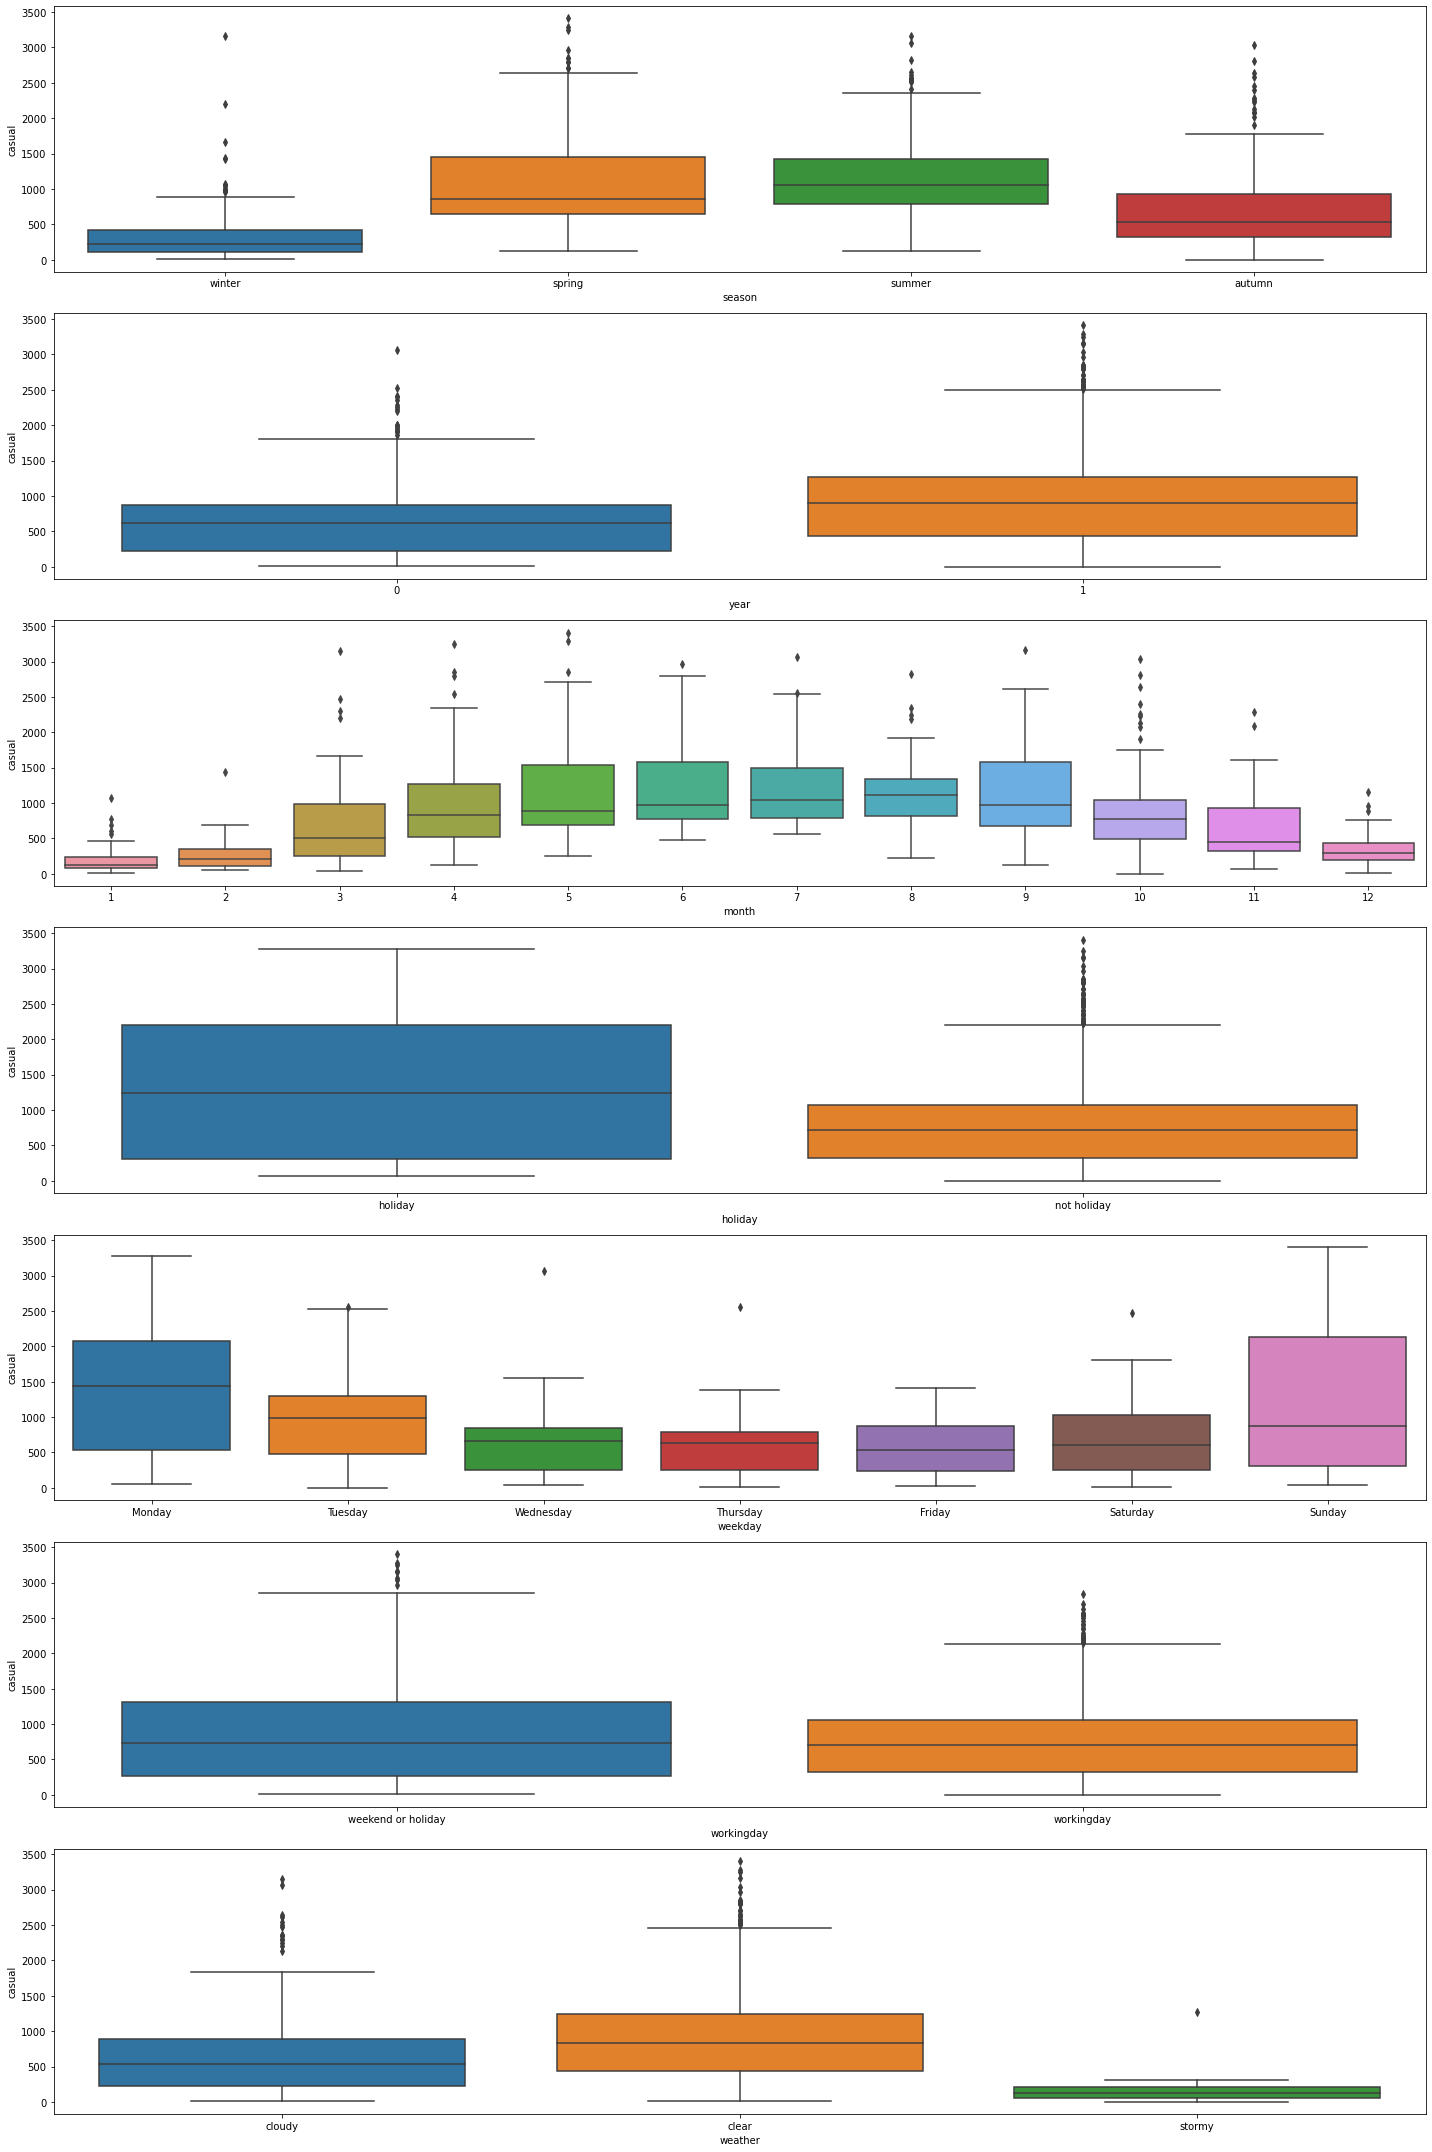

In [49]:
lista_categoricas = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["casual"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();

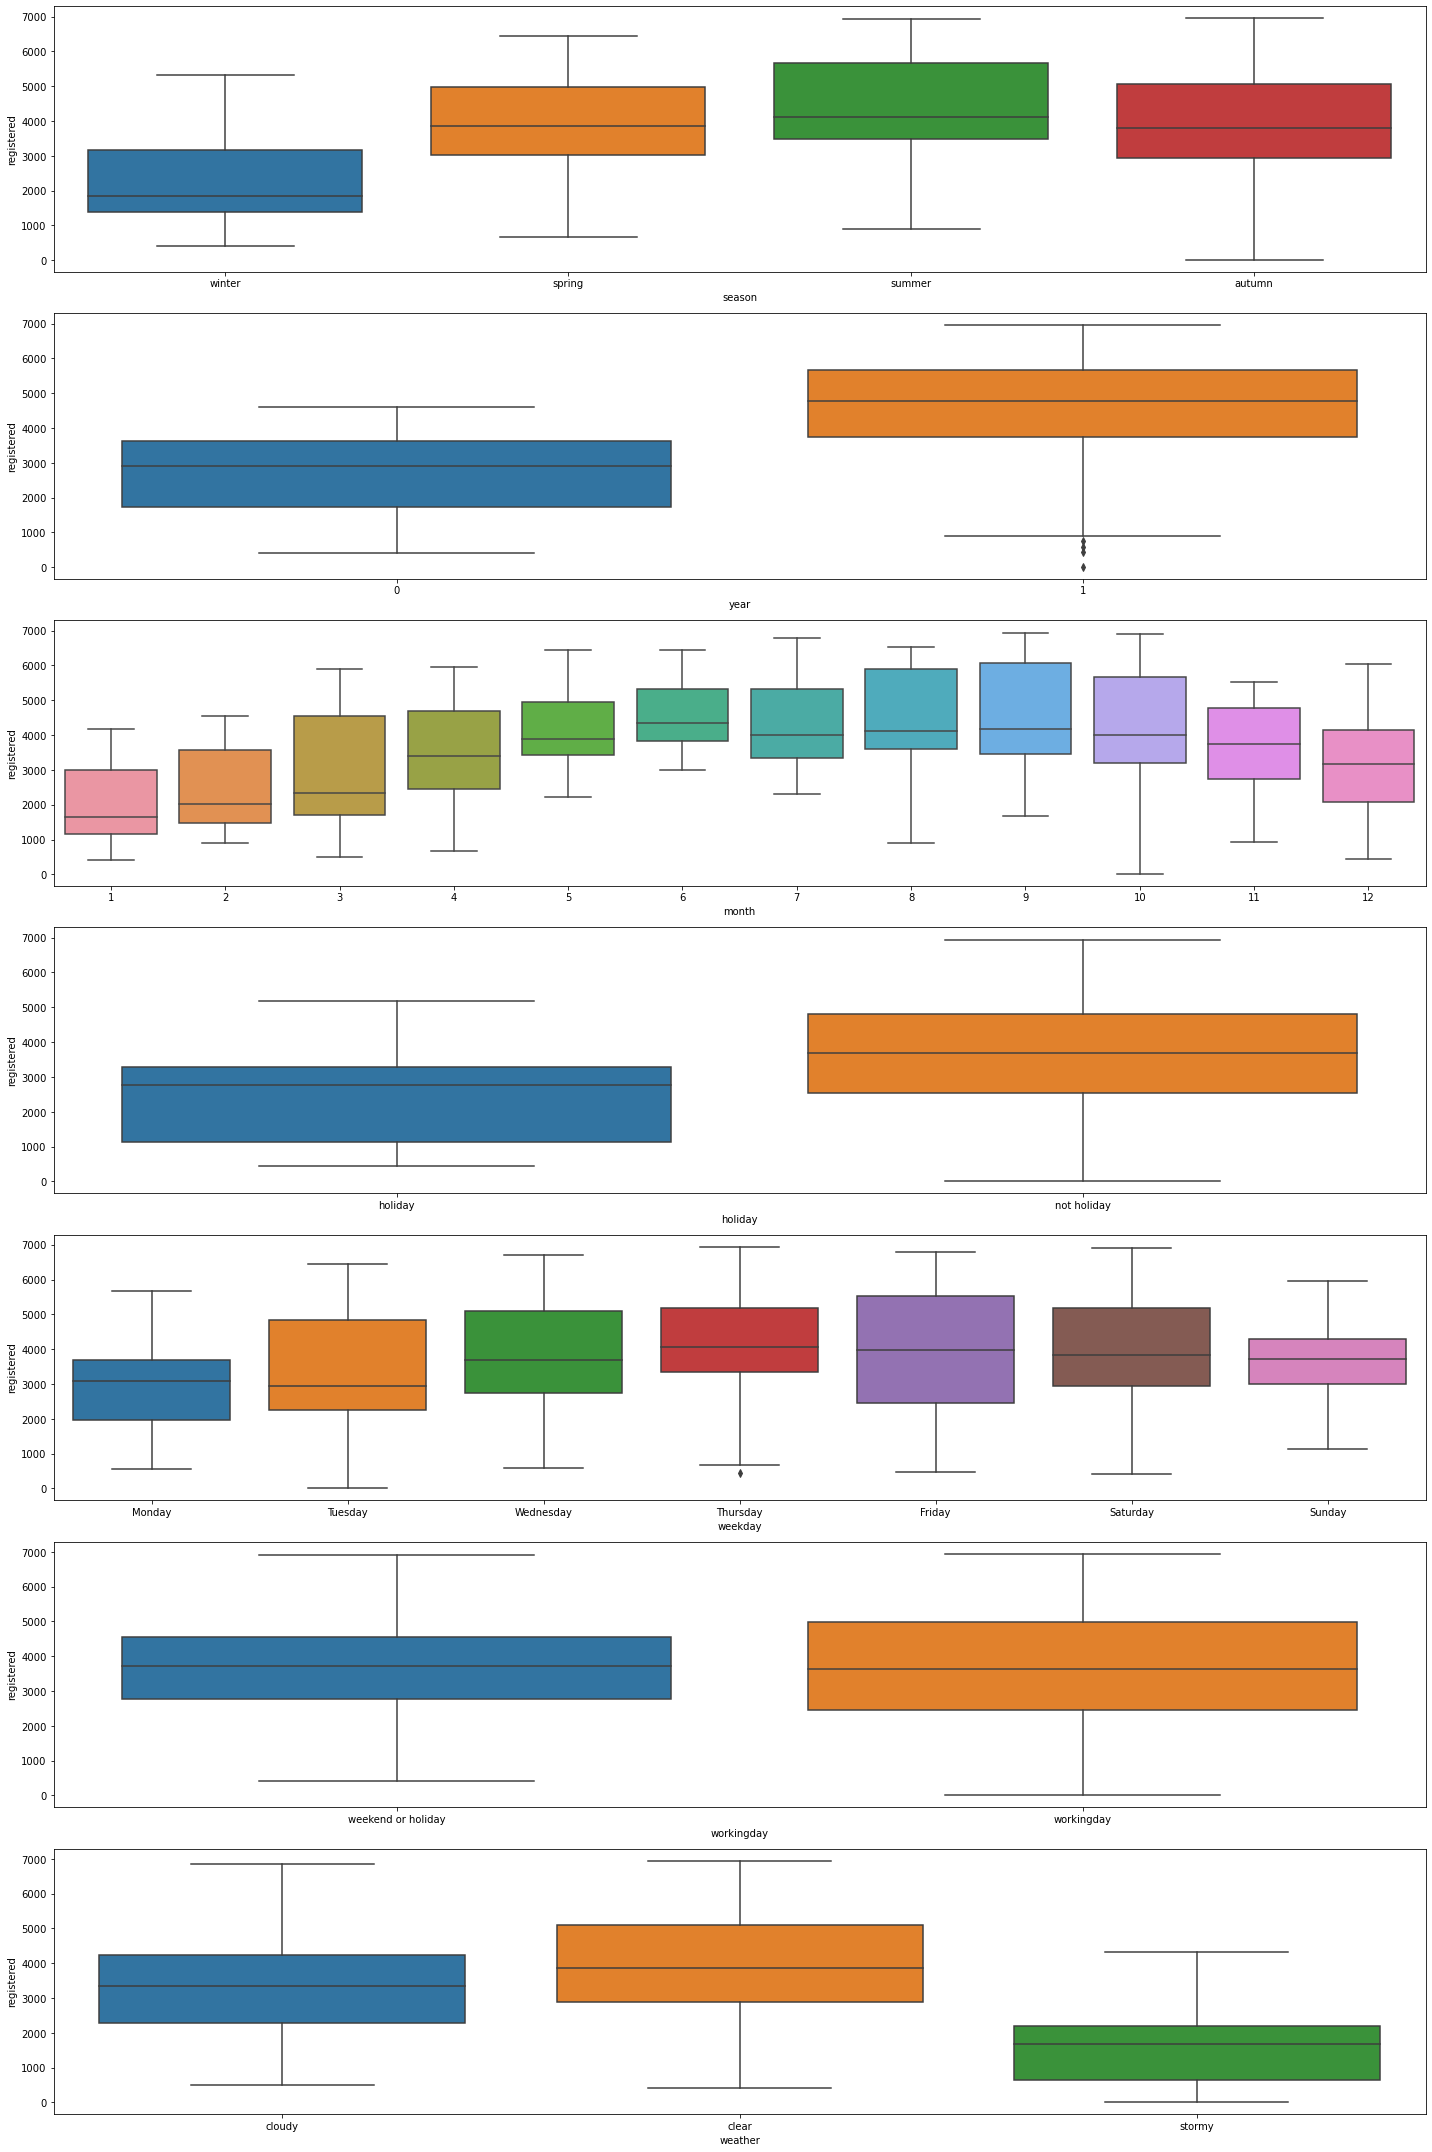

In [50]:
fig, axes = plt.subplots(7, 1, figsize = (20, 30))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["registered"], data = df, ax = axes[i])
    
plt.tight_layout()
plt.show();

## Detección y análisis de outliers

In [51]:
# seleccionamos las columnas numéricas
df_numericas = df.select_dtypes(include= np.number)
df_numericas.drop(['year', 'month'], axis= 1, inplace=True) # eliminamos las columnas que son números pero realmente son categóricas
df_numericas.sample()

,temp,hum,windspeed,casual,registered
717,13.6325,62.5417,12.334164,333,4934


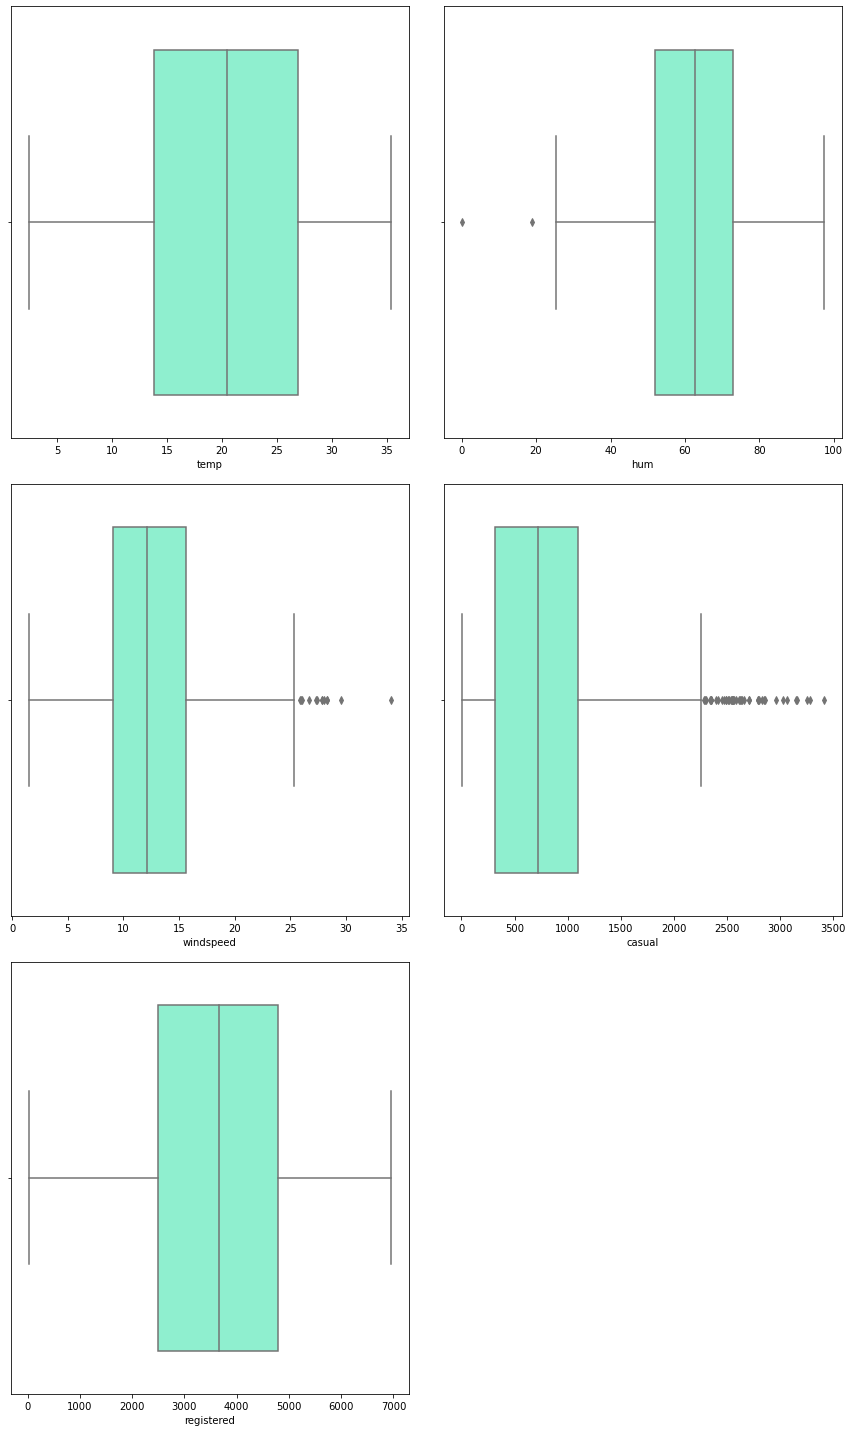

In [52]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    # para trazar una línea de densidad
    sns.boxplot(x=df_numericas[columna], data=df_numericas,
                ax=axes[indice], color="aquamarine")


plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [53]:
# creamos una función para detectar los outliers y extraerlos en un dataframe, además de obtener sus índices en un diccionario
def detectar_outliers(lista_columnas, dataframe):
    dicc_indices = {}
    df = pd.DataFrame()
    for col in lista_columnas:
        Q1 = np.percentile(dataframe[col], 25)
        Q3 = np.percentile(dataframe[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_data = dataframe[(dataframe[col] < (Q1 - outlier_step)) | (dataframe[col] > (Q3 + outlier_step))]
        df = pd.concat([df, outliers_data], axis=0)
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))
    return df, dicc_indices

In [54]:
# usamos la función
df_outliers, ind_outliers = detectar_outliers(df_numericas.columns, df)

In [55]:
# Los índices de los outliers son:
ind_outliers 

{'hum': [49, 68],
 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720],
 'casual': [148,
  183,
  184,
  196,
  246,
  281,
  440,
  446,
  454,
  455,
  461,
  468,
  469,
  475,
  489,
  496,
  503,
  504,
  510,
  511,
  512,
  517,
  518,
  524,
  531,
  532,
  538,
  539,
  549,
  559,
  567,
  580,
  594,
  608,
  609,
  616,
  622,
  629,
  630,
  636,
  643,
  657,
  664,
  679]}

In [56]:
df_outliers.duplicated().sum()

1

In [57]:
# borramos los duplicados del dataframe de outliers para explorarlos mejor
df_outliers.drop_duplicates(inplace=True)
df_outliers

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
49,2018-02-19,winter,0,2,holiday,Monday,weekend or holiday,clear,16.365847,18.7917,34.000021,532,1103
68,2018-03-10,winter,0,3,not holiday,Saturday,weekend or holiday,stormy,15.952731,0.0000,17.545759,46,577
44,2018-02-14,winter,0,2,not holiday,Wednesday,workingday,clear,17.015000,37.5833,27.999836,208,1705
93,2018-04-04,spring,0,4,not holiday,Wednesday,workingday,clear,23.506653,42.6250,25.833257,734,2381
94,2018-04-05,spring,0,4,not holiday,Thursday,workingday,cloudy,16.980847,64.2083,26.000489,167,1628
292,2018-10-20,autumn,0,10,not holiday,Saturday,weekend or holiday,clear,19.509153,63.6250,28.292425,471,3724
382,2019-01-18,winter,1,1,not holiday,Friday,workingday,clear,12.436653,44.3333,27.833743,109,3267
407,2019-02-12,winter,1,2,not holiday,Tuesday,workingday,clear,5.227500,46.4583,27.417204,73,1456
420,2019-02-25,winter,1,2,not holiday,Monday,workingday,clear,11.924153,39.5833,28.250014,317,2415
431,2019-03-08,winter,1,3,not holiday,Friday,workingday,clear,21.627500,56.7500,29.584721,486,4896


In [58]:
# sacamos los estadísticos principales de las columnas numéricas para comparar los valores de los outliers con ellos
df_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000


- Concluimos que no parece haber errores en los datos, tan solo valores no típicos que podrían ser perfectamente reales y por tanto afectar a las variables respuesta, de manera que decidimos gestionarlos con un RobustScaler.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    int64         
 3   month       730 non-null    int64         
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 96.0+ KB


In [60]:
df[['year', 'month']] = df[['year', 'month']].astype('category')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    category      
 3   month       730 non-null    category      
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.5+ KB


## Guardamos los datos

In [62]:
df.to_csv('datos/bikes_clean.csv')

In [63]:
df.to_pickle('datos/bikes_clean_pickle.pkl')